In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

from sklearn.datasets import load_breast_cancer

from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

(569, 30)

In [23]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
breast_labels = breast.target
breast_labels.shape

(569,)

In [25]:
labels = np.reshape(breast_labels,(569,1))

final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [26]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names

features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [27]:
breast_dataset.shape

(569, 31)

In [28]:
x = breast_dataset.values[:,0:30]
y = breast_dataset.values[:,30]

# Problem 1
Use the cancer dataset to build a Naïve Bayesian model to classify the type of cancer (Malignant vs. benign).

In [29]:
# Use 80% and 20% split between training and evaluation (test).
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88        47
         1.0       0.92      0.91      0.92        67

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



Text(33.0, 0.5, 'actual label')

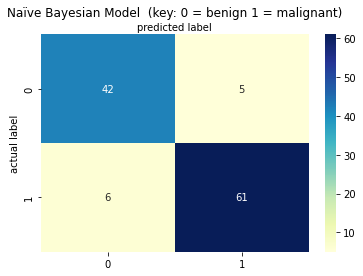

In [52]:
# Naive Bayesian model
nb = GaussianNB()
nb.fit(x_train, y_train)

# Get Test Predictions
y_pred = nb.predict(x_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Create confusion matrix
conf_m = confusion_matrix(y_test, y_pred)
fig,ax = plt.subplots()
sns.heatmap(pd.DataFrame(conf_m),annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position('top')
plt.title('Naïve Bayesian Model  (key: 0 = benign 1 = malignant)')
plt.xlabel('predicted label')
plt.ylabel('actual label')

# Problem 2
Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training.

In [41]:
from sklearn.decomposition import PCA

PCA_dataset = breast_dataset

pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3' ])
principalDF.head()

,principal component 1,principal component 2,principal component 3
0,1160.142574,-293.917544,48.578398
1,1269.122443,15.630182,-35.394534
2,995.793889,39.156743,-1.709753
3,-407.180803,-67.380320,8.672848
4,930.341180,189.340742,1.374801


In [35]:
finalDf = pd.concat([principalDF, PCA_dataset[['label']]], axis = 1) 

In [55]:
# Use 80% and 20% split between training and evaluation (test).
x_train, x_test, y_train, y_test = model_selection.train_test_split(principalDF, y, test_size = 0.2, random_state = 0)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [56]:
cl = LogisticRegression(max_iter = 4000, C = 0.1)
cl.fit(x_train, y_train)

y_pred = cl.predict(x_test)

In [57]:
conf_ma = metrics.confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report: \n", report)

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        47
         1.0       0.89      1.00      0.94        67

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.93      0.93       114



Text(33.0, 0.5, 'actual label')

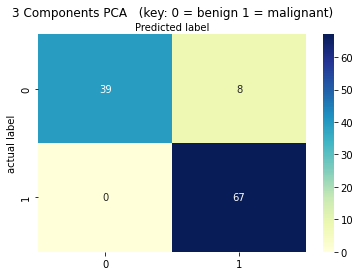

In [58]:
# Create confusion matrix
conf_ma = confusion_matrix(y_test, y_pred)
fig,ax = plt.subplots()
sns.heatmap(pd.DataFrame(conf_ma),annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position('top')
plt.title('3 Components PCA   (key: 0 = benign 1 = malignant)')
plt.xlabel('Predicted label')
plt.ylabel('actual label')


# Problem 3
repeat problem 2. This time, replace logistic regression with the Bayes classifier.

              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87        47
         1.0       0.87      0.99      0.92        67

    accuracy                           0.90       114
   macro avg       0.92      0.89      0.90       114
weighted avg       0.91      0.90      0.90       114



Text(33.0, 0.5, 'actual label')

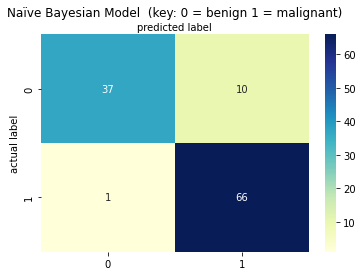

In [59]:
# Naive Bayesian model
nb = GaussianNB()
nb.fit(x_train, y_train)

# Get Test Predictions
y_pred = nb.predict(x_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Create confusion matrix
conf_ma = confusion_matrix(y_test, y_pred)
fig,ax = plt.subplots()
sns.heatmap(pd.DataFrame(conf_ma),annot = True, cmap = "YlGnBu", fmt = 'g')
ax.xaxis.set_label_position('top')
plt.title('Naïve Bayesian Model  (key: 0 = benign 1 = malignant)')
plt.xlabel('predicted label')
plt.ylabel('actual label')